<a href="https://colab.research.google.com/github/Johnny-DF26/Visao_Computacional/blob/main/Autoencoders_RedeNeural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders

## Bibliotecas

In [3]:
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist

## Base de Dados

In [26]:
(X_treino, y_treino), (X_teste, y_teste) = keras.datasets.mnist.load_data()

In [27]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

## Pré-Processamento dos dados

In [28]:
X_treino = X_treino / 255
X_teste = X_teste / 255

In [29]:
X_treino = X_treino.reshape(X_treino.shape[0], X_treino.shape[1] * X_treino.shape[2])
X_teste = X_teste.reshape(X_teste.shape[0], X_teste.shape[1] * X_teste.shape[2])

In [30]:
X_treino.shape, X_teste.shape

((60000, 784), (10000, 784))

In [31]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

## Construção e treinamento do autoencoder

In [35]:
autoencoder = keras.models.Sequential()

# Codificação
autoencoder.add(keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))
autoencoder.add(keras.layers.Dense(units=64, activation='relu'))

# Layer Codificada
autoencoder.add(keras.layers.Dense(units=32, activation='relu'))

# Decodificação
autoencoder.add(keras.layers.Dense(units=64, activation='relu'))
autoencoder.add(keras.layers.Dense(units=128, activation='relu'))
autoencoder.add(keras.layers.Dense(units=784, activation='sigmoid'))

In [36]:
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 64)                2112      
                                                                 
 dense_24 (Dense)            (None, 128)               8320      
                                                                 
 dense_25 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [38]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(X_treino, X_treino, epochs=50)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0818 - accuracy: 0.0141
Epoch 50/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0817 - accuracy: 0.0140


### Codificação

In [40]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_20_input')>

In [42]:
autoencoder.get_layer('dense_22').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_22')>

In [43]:
encoder = keras.models.Model(inputs= autoencoder.input, outputs= autoencoder.get_layer('dense_22').output)

In [44]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20_input (InputLayer)  [(None, 784)]            0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [49]:
X_teste[0].reshape(1,28,28).shape

(1, 28, 28)

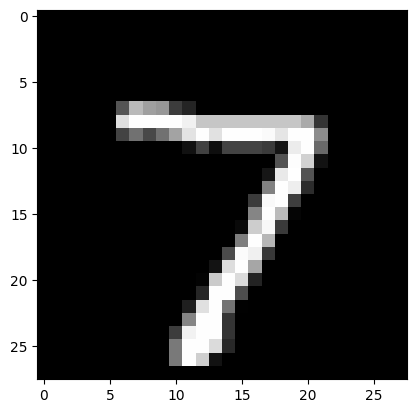

In [51]:
plt.imshow(X_teste[0].reshape(28,28), cmap='gray')

In [52]:
X_teste[0].reshape(1,-1).shape

(1, 784)

In [53]:
imagem_codificada = encoder.predict(X_teste[0].reshape(1,-1))
imagem_codificada

1/1 [==============================] - 0s 220ms/step


array([[ 6.387881 ,  2.9441993,  3.8530366,  8.006494 ,  0.9286095,
         5.8894496,  0.       ,  3.3373635,  4.2641354,  3.249118 ,
         0.       ,  7.1845956,  4.867379 ,  5.227629 ,  3.6442842,
         3.1176052,  3.3914554,  2.6289403,  0.       ,  4.2940364,
         0.       , 10.847063 ,  4.6245465,  0.       ,  2.8207736,
         0.       ,  2.9054155,  5.9177947,  4.6760435,  2.8732715,
         3.4133892,  1.5840651]], dtype=float32)

In [59]:
imagem_codificada.shape

(1, 32)

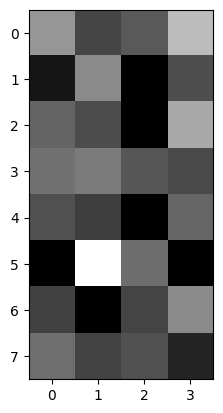

In [62]:
plt.imshow(imagem_codificada.reshape(8,4), cmap='gray')

### Decodificação

In [109]:
# 1 Forma
entrada = autoencoder.get_layer('dense_23').input
saida = autoencoder.output

In [110]:
# 2 Forma
input_layer_decoder = keras.layers.Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3](input_layer_decoder)
decoder_layer2 = autoencoder.layers[4](decoder_layer1)
decoder_layer3 = autoencoder.layers[5](decoder_layer2)

In [111]:
decoder = keras.models.Model(inputs=input_layer_decoder, outputs=decoder_layer3)

In [112]:
decoder.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32)]              0         
                                                                 
 dense_23 (Dense)            (None, 64)                2112      
                                                                 
 dense_24 (Dense)            (None, 128)               8320      
                                                                 
 dense_25 (Dense)            (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [113]:
imagem_codificada.shape

(1, 32)

In [114]:
imagem_decodificada = decoder.predict(imagem_codificada)
imagem_decodificada.shape

1/1 [==============================] - 0s 48ms/step


(1, 784)

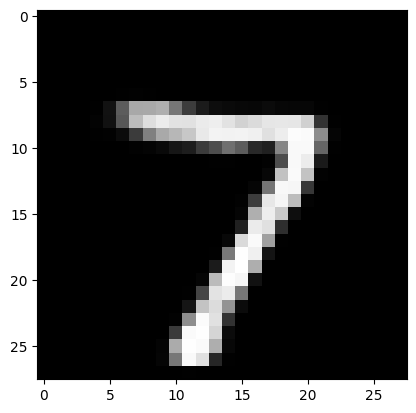

In [115]:
plt.imshow(imagem_decodificada.reshape(28,28), cmap='gray');

## Codificação e decodificação das imagens de teste

In [116]:
imagens_teste = encoder.predict(X_teste)

313/313 [==============================] - 1s 2ms/step


In [118]:
imagens_teste.shape

(10000, 32)

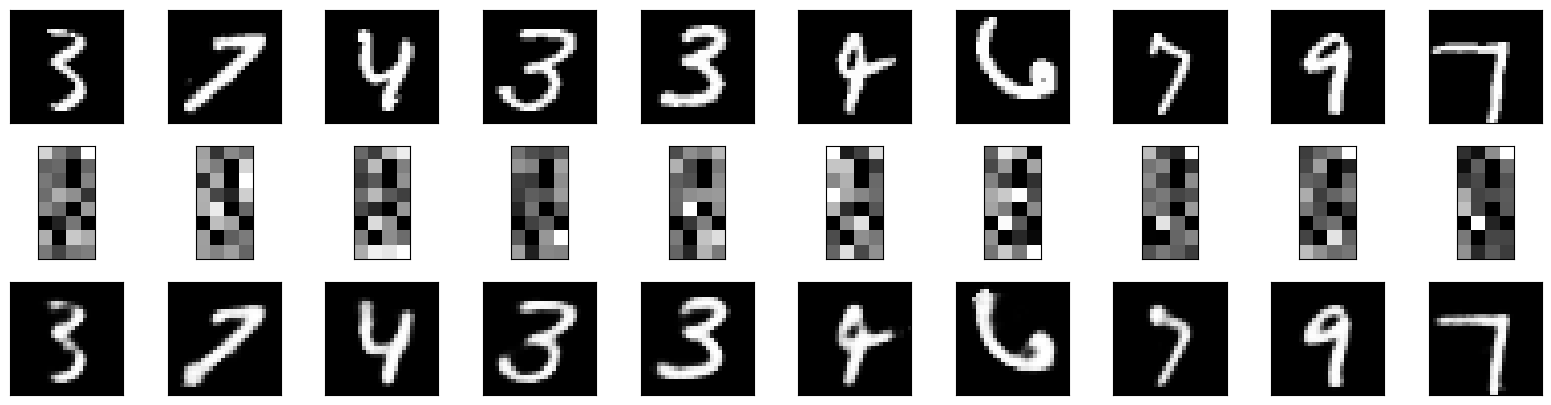

In [145]:
numero_img = 10
imagens_teste = np.random.randint(0,10000, size=numero_img)
# print(imagens_teste)
plt.figure(figsize=(20,5))
for i, imagem_indice in enumerate(imagens_teste):
    ax = plt.subplot(3,10, i+1)
    plt.imshow(X_teste[imagem_indice].reshape(28,28), cmap='gray')
    plt.xticks(())
    plt.yticks(())

# Imagens codificadas

    ax = plt.subplot(3,10,i+1+numero_img)
    imagem_codificada = encoder.predict(X_teste[imagem_indice].reshape(1,-1), verbose=False)
    plt.imshow(imagem_codificada.reshape(8,4), cmap='gray')
    plt.xticks(())
    plt.yticks(())

# Imagens decodificadas

    ax = plt.subplot(3,10,i+1+numero_img*2)
    # imagem_decodificada = decoder.predict(imagem_codificada.reshape(28,28), verbose=False)
    plt.imshow(decoder.predict(imagem_codificada, verbose=False).reshape(28,28), cmap='gray')
    plt.xticks(())
    plt.yticks(())